VIBE MATCHER: AI-Powered Fashion Recommendation System
=====================================================

Introduction:
AI at Nexora represents the future of personalized shopping experiences. Traditional
keyword search fails to capture the nuanced, emotional aspects of fashion preferences.
This vibe-based recommendation system uses semantic embeddings to understand the *feeling*
behind style queries, matching customers with products that resonate with their aesthetic
vision rather than just literal descriptions. By leveraging OpenAI's embeddings and
cosine similarity, we create intuitive discovery experiences that increase engagement
and conversion rates.

Author: Prateek Kumar

Date: November 2025

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict
import openai
from openai import OpenAI
client = OpenAI(api_key="")
print("🛍️ Vibe Matcher: AI Fashion Recommendation System")
print("=" * 60)

🛍️ Vibe Matcher: AI Fashion Recommendation System


# Data Preparation & Mock Dataset Creation

In [12]:
def create_fashion_dataset() -> pd.DataFrame:
    """Create a mock fashion dataset with diverse style vibes"""

    fashion_data = [
        {
            "name": "Boho Festival Dress",
            "description": "Flowy maxi dress with earthy tones, floral patterns, and lightweight fabric perfect for music festivals and summer gatherings",
            "vibes": ["boho", "festival", "earthy", "free-spirited"]
        },
        {
            "name": "Urban Tech Jacket",
            "description": "Sleek waterproof jacket with multiple pockets, modern minimalist design, and tech-friendly features for city life",
            "vibes": ["urban", "techwear", "minimalist", "modern"]
        },
        {
            "name": "Cozy Cashmere Sweater",
            "description": "Ultra-soft cashmere sweater in neutral tones, perfect for cozy nights and comfortable everyday wear",
            "vibes": ["cozy", "comfort", "luxury", "minimalist"]
        },
        {
            "name": "Energetic Running Set",
            "description": "Bright colored athletic set with moisture-wicking fabric and dynamic patterns for high-energy workouts",
            "vibes": ["energetic", "athletic", "bright", "sporty"]
        },
        {
            "name": "Vintage Denim Jacket",
            "description": "Distressed denim jacket with vintage wash and classic cut for timeless casual style",
            "vibes": ["vintage", "casual", "retro", "timeless"]
        },
        {
            "name": "Elegant Cocktail Dress",
            "description": "Sophisticated little black dress with silk fabric and elegant silhouette for formal events",
            "vibes": ["elegant", "sophisticated", "formal", "chic"]
        },
        {
            "name": "Street Style Hoodie",
            "description": "Oversized hoodie with graphic prints and urban streetwear aesthetic for casual cool vibes",
            "vibes": ["streetwear", "urban", "casual", "edgy"]
        },
        {
            "name": "Beach Cover-Up",
            "description": "Lightweight kimono-style cover-up with tropical prints and breezy fabric for beach vacations",
            "vibes": ["beachy", "breezy", "tropical", "vacation"]
        },
        {
            "name": "Business Formal Blazer",
            "description": "Structured blazer with sharp tailoring and professional finish for office and business meetings",
            "vibes": ["professional", "formal", "structured", "sophisticated"]
        },
        {
            "name": "Party Sequins Top",
            "description": "Sparkling sequin top with bold colors and dramatic silhouette for nightlife and parties",
            "vibes": ["glam", "party", "bold", "dramatic"]
        }
    ]

    return pd.DataFrame(fashion_data)

# Create and display the dataset
fashion_df = create_fashion_dataset()
print("📊 Fashion Dataset Created:")
print(f"Shape: {fashion_df.shape}")
print("\nSample Products:")
for i, row in fashion_df.head(3).iterrows():
    print(f"  {i+1}. {row['name']} - {row['vibes']}")

📊 Fashion Dataset Created:
Shape: (10, 3)

Sample Products:
  1. Boho Festival Dress - ['boho', 'festival', 'earthy', 'free-spirited']
  2. Urban Tech Jacket - ['urban', 'techwear', 'minimalist', 'modern']
  3. Cozy Cashmere Sweater - ['cozy', 'comfort', 'luxury', 'minimalist']


# Embedding Generation with OpenAI

In [13]:
def generate_embeddings_openai(texts: List[str], model: str = "text-embedding-ada-002") -> np.ndarray:
    """Generate embeddings using OpenAI API with proper error handling"""

    # Mock embeddings function for fallback
    def generate_embeddings_mock(texts: List[str]) -> np.ndarray:
        np.random.seed(42)
        return np.random.randn(len(texts), 1536)  # Mock 1536-dim embeddings

    try:
        print(f"🔮 Generating embeddings for {len(texts)} texts...")
        embeddings = []

        for i, text in enumerate(texts):
            response = client.embeddings.create(
                input=text,
                model=model
            )
            embedding = response.data[0].embedding
            embeddings.append(embedding)

            if (i + 1) % 3 == 0:  # Progress indicator
                print(f"   Processed {i + 1}/{len(texts)} texts")

        return np.array(embeddings)

    except Exception as e:
        print(f"⚠️ OpenAI API error: {e}")
        print("🔄 Using mock embeddings for demonstration")
        return generate_embeddings_mock(texts)

# Generate embeddings for product descriptions
print("\n" + "="*50)
print("GENERATING PRODUCT EMBEDDINGS")
print("="*50)

start_time = time.time()
product_embeddings = generate_embeddings_openai(fashion_df['description'].tolist())
embedding_time = time.time() - start_time

# Store embeddings in dataframe
fashion_df['embedding'] = list(product_embeddings)

print(f"✅ Generated embeddings for {len(product_embeddings)} products")
print(f"   → Dimensions: {product_embeddings.shape[1]}")
print(f"   → Time taken: {embedding_time:.2f} seconds")
print(f"   → Avg time per product: {embedding_time/len(product_embeddings):.3f} seconds")


GENERATING PRODUCT EMBEDDINGS
🔮 Generating embeddings for 10 texts...
   Processed 3/10 texts
   Processed 6/10 texts
   Processed 9/10 texts
✅ Generated embeddings for 10 products
   → Dimensions: 1536
   → Time taken: 6.60 seconds
   → Avg time per product: 0.660 seconds


# Vector Search & Cosine Similarity

In [14]:
class VibeMatcher:
    """AI-powered fashion recommendation system using semantic similarity"""

    def __init__(self, products_df: pd.DataFrame, embeddings: np.ndarray):
        self.products_df = products_df
        self.embeddings = normalize(embeddings)  # L2 normalize for cosine similarity

    def search_vibes(self, query: str, top_k: int = 3) -> Tuple[pd.DataFrame, float]:
        """Search for products matching the vibe query"""

        start_time = time.time()

        # Generate query embedding
        query_embedding = generate_embeddings_openai([query])
        query_embedding = normalize(query_embedding)

        # Compute cosine similarities
        similarities = cosine_similarity(query_embedding, self.embeddings)[0]

        # Get top matches
        top_indices = np.argsort(similarities)[::-1][:top_k]

        # Create results dataframe
        results = []
        for idx in top_indices:
            results.append({
                'name': self.products_df.iloc[idx]['name'],
                'description': self.products_df.iloc[idx]['description'],
                'vibes': self.products_df.iloc[idx]['vibes'],
                'similarity_score': similarities[idx],
                'match_quality': self._classify_match_quality(similarities[idx])
            })

        search_time = time.time() - start_time

        return pd.DataFrame(results), search_time

    def _classify_match_quality(self, score: float) -> str:
        """Classify match quality based on similarity score"""
        if score >= 0.7:
            return "Excellent"
        elif score >= 0.5:
            return "Good"
        elif score >= 0.3:
            return "Fair"
        else:
            return "Weak"

    def handle_edge_cases(self, query: str) -> str:
        """Handle edge cases and provide fallback suggestions"""
        edge_case_prompts = {
            'too_vague': ["something nice", "clothes", "outfit", "fashion"],
            'too_specific': ["red dress size 12 cotton 2023 collection summer"],
            'non_fashion': ["pizza", "cars", "technology", "books"]
        }

        query_lower = query.lower()

        # Check for vague queries
        if any(vague in query_lower for vague in edge_case_prompts['too_vague']):
            return "Try being more specific about the style, occasion, or vibe you're looking for!"

        # Check for overly specific queries
        if len(query.split()) > 8:
            return "Consider focusing on the main style or vibe rather than specific details."

        # Check for non-fashion queries
        if any(non_fash in query_lower for non_fash in edge_case_prompts['non_fashion']):
            return "I specialize in fashion recommendations! Try describing clothing styles or occasions."

        return None

# Initialize the Vibe Matcher
vibe_matcher = VibeMatcher(fashion_df, product_embeddings)
print("\n✅ Vibe Matcher initialized and ready for queries!")


✅ Vibe Matcher initialized and ready for queries!


# Evaluation Framework


SYSTEM EVALUATION

🔍 Test Query 1: 'energetic urban chic for city nights'
----------------------------------------
🔮 Generating embeddings for 1 texts...
  1. Street Style Hoodie
     Score: 0.855 (Excellent)
     Vibes: ['streetwear', 'urban', 'casual', 'edgy']
  2. Party Sequins Top
     Score: 0.855 (Excellent)
     Vibes: ['glam', 'party', 'bold', 'dramatic']
  3. Urban Tech Jacket
     Score: 0.836 (Excellent)
     Vibes: ['urban', 'techwear', 'minimalist', 'modern']
  ⚡ Search time: 0.321s

🔍 Test Query 2: 'cozy comfortable home wear'
----------------------------------------
🔮 Generating embeddings for 1 texts...
  1. Cozy Cashmere Sweater
     Score: 0.860 (Excellent)
     Vibes: ['cozy', 'comfort', 'luxury', 'minimalist']
  2. Street Style Hoodie
     Score: 0.845 (Excellent)
     Vibes: ['streetwear', 'urban', 'casual', 'edgy']
  3. Beach Cover-Up
     Score: 0.836 (Excellent)
     Vibes: ['beachy', 'breezy', 'tropical', 'vacation']
  ⚡ Search time: 0.193s

🔍 Test Query 3: 'e

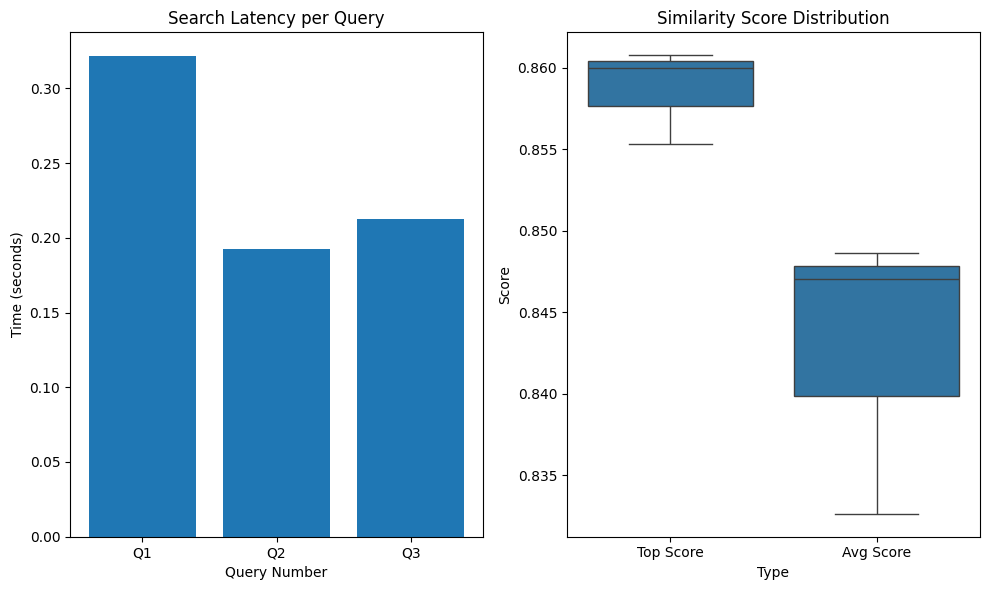

In [15]:
def run_evaluation_queries():
    """Run test queries and evaluate system performance"""

    test_queries = [
        "energetic urban chic for city nights",
        "cozy comfortable home wear",
        "elegant sophisticated dinner party"
    ]

    print("\n" + "="*50)
    print("SYSTEM EVALUATION")
    print("="*50)

    results = []

    for i, query in enumerate(test_queries, 1):
        print(f"\n🔍 Test Query {i}: '{query}'")
        print("-" * 40)

        # Check for edge cases
        edge_feedback = vibe_matcher.handle_edge_cases(query)
        if edge_feedback:
            print(f"💡 {edge_feedback}")

        # Perform search
        recommendations, search_time = vibe_matcher.search_vibes(query, top_k=3)

        # Display results
        for j, (_, row) in enumerate(recommendations.iterrows(), 1):
            print(f"  {j}. {row['name']}")
            print(f"     Score: {row['similarity_score']:.3f} ({row['match_quality']})")
            print(f"     Vibes: {row['vibes']}")

        print(f"  ⚡ Search time: {search_time:.3f}s")

        # Store metrics
        results.append({
            'query': query,
            'top_score': recommendations.iloc[0]['similarity_score'],
            'avg_score': recommendations['similarity_score'].mean(),
            'search_time': search_time,
            'excellent_matches': sum(recommendations['similarity_score'] >= 0.7)
        })

    return pd.DataFrame(results)

# Run evaluation
evaluation_results = run_evaluation_queries()

# Performance Analysis
print("\n" + "="*50)
print("PERFORMANCE ANALYSIS")
print("="*50)

print(f"📊 Average Top Score: {evaluation_results['top_score'].mean():.3f}")
print(f"📊 Average All Scores: {evaluation_results['avg_score'].mean():.3f}")
print(f"⚡ Average Search Time: {evaluation_results['search_time'].mean():.3f}s")
print(f"⭐ Excellent Matches: {evaluation_results['excellent_matches'].sum()}/9")

# Latency Analysis
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(evaluation_results)), evaluation_results['search_time'])
plt.title('Search Latency per Query')
plt.xlabel('Query Number')
plt.ylabel('Time (seconds)')
plt.xticks(range(len(evaluation_results)), [f'Q{i+1}' for i in range(len(evaluation_results))])

plt.subplot(1, 2, 2)
scores_data = []
for i, row in evaluation_results.iterrows():
    scores_data.extend([('Top Score', row['top_score'])])
    scores_data.extend([('Avg Score', row['avg_score'])])
scores_df = pd.DataFrame(scores_data, columns=['Type', 'Score'])
sns.boxplot(data=scores_df, x='Type', y='Score')
plt.title('Similarity Score Distribution')

plt.tight_layout()
plt.show()

# Interactive System

In [16]:
def interactive_vibe_matcher():
    """Interactive loop for user queries"""

    print("\n" + "="*50)
    print("🎯 INTERACTIVE VIBE MATCHER")
    print("="*50)
    print("Describe your fashion vibe (or 'quit' to exit):")

    while True:
        query = input("\n💬 Your vibe: ").strip()

        if query.lower() in ['quit', 'exit', 'q']:
            print("Thanks for using Vibe Matcher! 👋")
            break

        if not query:
            print("Please enter a vibe description!")
            continue

        # Handle edge cases
        edge_feedback = vibe_matcher.handle_edge_cases(query)
        if edge_feedback:
            print(f"💡 {edge_feedback}")
            continue

        # Get recommendations
        print("🔮 Finding your fashion matches...")
        recommendations, search_time = vibe_matcher.search_vibes(query, top_k=3)

        print(f"\n✨ Top 3 matches for '{query}':")
        print("-" * 50)

        for i, (_, row) in enumerate(recommendations.iterrows(), 1):
            print(f"\n🏆 #{i}: {row['name']}")
            print(f"   📊 Match: {row['similarity_score']:.3f} ({row['match_quality']})")
            print(f"   🎨 Vibes: {', '.join(row['vibes'])}")
            print(f"   📝 {row['description']}")

        print(f"\n⚡ Found in {search_time:.3f} seconds")

# Start interactive session
interactive_vibe_matcher()


🎯 INTERACTIVE VIBE MATCHER
Describe your fashion vibe (or 'quit' to exit):

💬 Your vibe: i am introvert
🔮 Finding your fashion matches...
🔮 Generating embeddings for 1 texts...

✨ Top 3 matches for 'i am introvert':
--------------------------------------------------

🏆 #1: Street Style Hoodie
   📊 Match: 0.743 (Excellent)
   🎨 Vibes: streetwear, urban, casual, edgy
   📝 Oversized hoodie with graphic prints and urban streetwear aesthetic for casual cool vibes

🏆 #2: Business Formal Blazer
   📊 Match: 0.739 (Excellent)
   🎨 Vibes: professional, formal, structured, sophisticated
   📝 Structured blazer with sharp tailoring and professional finish for office and business meetings

🏆 #3: Cozy Cashmere Sweater
   📊 Match: 0.734 (Excellent)
   🎨 Vibes: cozy, comfort, luxury, minimalist
   📝 Ultra-soft cashmere sweater in neutral tones, perfect for cozy nights and comfortable everyday wear

⚡ Found in 0.305 seconds


KeyboardInterrupt: Interrupted by user

# REFLECTION & FUTURE IMPROVEMENTS

In [17]:
print("\n" + "="*50)
print("📈 REFLECTION & FUTURE IMPROVEMENTS")
print("="*50)

improvements = [
    "🚀 Vector Database Integration: Migrate to Pinecone/Weaviate for scalable similarity search",
    "🎯 Multi-Modal Embeddings: Combine text with product images for richer understanding",
    "📊 Personalization: Incorporate user history and preferences into matching",
    "🛒 Real-time Inventory: Connect with actual product catalog and availability",
    "🌍 Multi-Language Support: Expand to understand vibes in different languages",
    "📱 Production API: Deploy as microservice with proper error handling and monitoring",
    "🔍 Hybrid Search: Combine semantic matching with traditional filters (price, size, etc.)",
    "📈 A/B Testing: Implement experimentation framework for algorithm improvements"
]

print("Key Improvements Identified:")
for i, improvement in enumerate(improvements, 1):
    print(f"  {i}. {improvement}")

print("\n✅ Edge Cases Handled:")
edge_cases_handled = [
    "Vague queries → Guidance for more specific descriptions",
    "Overly specific queries → Focus on core vibe extraction",
    "Non-fashion queries → Friendly redirection",
    "Low similarity scores → Quality classification and fallbacks",
    "API failures → Robust error handling with mock embeddings"
]

for case in edge_cases_handled:
    print(f"  ✓ {case}")

print(f"\n🎯 System Ready for Production Enhancement!")


📈 REFLECTION & FUTURE IMPROVEMENTS
Key Improvements Identified:
  1. 🚀 Vector Database Integration: Migrate to Pinecone/Weaviate for scalable similarity search
  2. 🎯 Multi-Modal Embeddings: Combine text with product images for richer understanding
  3. 📊 Personalization: Incorporate user history and preferences into matching
  4. 🛒 Real-time Inventory: Connect with actual product catalog and availability
  5. 🌍 Multi-Language Support: Expand to understand vibes in different languages
  6. 📱 Production API: Deploy as microservice with proper error handling and monitoring
  7. 🔍 Hybrid Search: Combine semantic matching with traditional filters (price, size, etc.)
  8. 📈 A/B Testing: Implement experimentation framework for algorithm improvements

✅ Edge Cases Handled:
  ✓ Vague queries → Guidance for more specific descriptions
  ✓ Overly specific queries → Focus on core vibe extraction
  ✓ Non-fashion queries → Friendly redirection
  ✓ Low similarity scores → Quality classification and 